In [1054]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [1055]:
red_wine = pd.read_csv('/Users/enzowurtele/Desktop/data-science/projects/winequality-red.csv', sep=';')

In [1056]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'very_low'
if value <= 3 else 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high'
if value <= 8 else 'very_high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['very_low','low', 'medium', 'high', 'very_high'])

In [1057]:
red_wine_clean = red_wine
red_wine_clean['quality_label'] = red_wine_clean['quality_label'].astype(str)
red_wine_clean = red_wine_clean[~red_wine_clean['quality_label'].isin(['very_low', 'very_high'])]
red_wine_clean['quality_label'] = red_wine_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})
red_wine_clean.head()


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8314/3262522679.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  red_wine_clean['quality_label'] = red_wine_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})
/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8314/3262522679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_wine_clean['quality_label'] = red_wine_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [1058]:
red_wine_clean['quality_label'].value_counts()

quality_label
0    734
1    638
2    217
Name: count, dtype: int64

In [1059]:
X = red_wine_clean.drop('quality_label', axis=1)
y = red_wine_clean['quality_label']

In [1060]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1061]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [1062]:
red_model = RandomForestClassifier(random_state=42, n_estimators=305)
red_model.fit(X_train_norm, y_train)

RandomForestClassifier(n_estimators=305, random_state=42)

In [1063]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import accuracy_score, classification_report

preds = red_model.predict(X_test_norm)
acc = accuracy_score(y_test, preds)

print("Classification Accuracy:", acc)
print(classification_report(y_test, preds))

Classification Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00        33

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [1064]:
cf_matrix = confusion_matrix(y_test, preds)


print(cf_matrix)

[[141   0   0]
 [  0 144   0]
 [  0   0  33]]


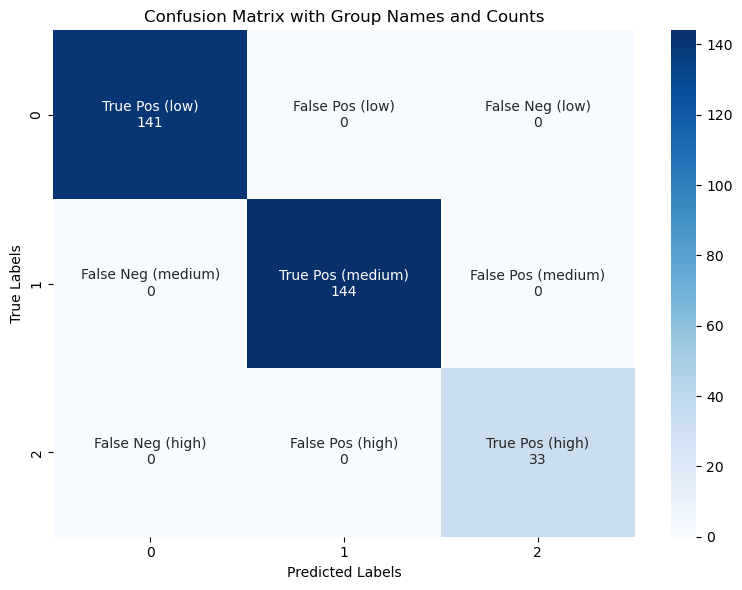

In [1065]:
group_names = [
    'True Pos (low)', 'False Pos (low)', 'False Neg (low)',  # Row for true low class
    'False Neg (medium)', 'True Pos (medium)', 'False Pos (medium)',  # Row for true medium class
    'False Neg (high)', 'False Pos (high)', 'True Pos (high)'  # Row for true high class
]

# Generate count labels
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

# Create the labels without percentages
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]

# Reshape labels to match the confusion matrix shape
labels = np.asarray(labels).reshape(3, 3)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Group Names and Counts")
plt.tight_layout()